### Notebook generates PDF distributions for IWP retrievals(test data), shows posterior dist is better estimate, Used for Fig. 9

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from iwc2tb.GMI.gmiData_test import gmiData
import os
from iwc2tb.GMI.three_sigma_rule import three_sigma
from matplotlib import cm
import pandas as pd
plt.rcParams.update({'font.size': 20})

In [2]:

np.linspace(0.01, 0.99, 50)

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [3]:
quantiles         = np.linspace(0.01, 0.99, 50)
imedian            = np.argwhere((quantiles >= 0.49) & (quantiles < 0.51))[0][0]
alist      = ["0", "1", "2", "3" ] 
alist      = ["0"]

In [4]:
AY      = []
AY_pre  = []
AY_mean = []
PR      = []
for i in alist:
    
    filename_aro = "qrnn_gmi_nn_lpa_v" + i + "_jan.pickle"

    with open(filename_aro, "rb") as f:   
        ay      = pickle.load(f)
        ay_pre  = pickle.load(f)
        ay_mean = pickle.load(f)
        pr      = pickle.load(f)
        ay_sam  = pickle.load(f)

        f.close()
        
    AY.append(ay)
    AY_pre.append(ay_pre.reshape(-1, 1, 50))
    AY_mean.append(ay_mean.reshape(-1, 1))
    PR.append(pr)

AY      = np.concatenate(AY, axis = 1)
AY_pre  = np.concatenate(AY_pre, axis = 1)
AY_mean = np.concatenate(AY_mean, axis = 1)
PR      = np.concatenate(PR, axis = 1)

    

In [7]:
AY.shape

(1681625, 1)

In [8]:
TY      = []
TY_pre  = []
TY_mean = []

for i in alist:
    
    filename_aro = "qrnn_gmi_nn_lpa_pr1_v" + i + "_jan.pickle" 

    with open(filename_aro, "rb") as f:   
        ty      = pickle.load(f)
        ty_pre  = pickle.load(f)
        ty_mean = pickle.load(f)
        pr      = pickle.load(f)
        ty_sam  = pickle.load(f)

        f.close()
        
    TY.append(ty)
    TY_pre.append(ty_pre.reshape(-1, 1, 50))
    TY_mean.append(ty_mean.reshape(-1, 1))


TY      = np.concatenate(TY, axis = 1)
TY_pre  = np.concatenate(TY_pre, axis = 1)
TY_mean = np.concatenate(TY_mean, axis = 1)


In [6]:
AY_mean.shape

(1681625, 1)

In [7]:
def below_threshold(AY, AY_mean):
    AY[AY < 1e-4] = 1e-4
    AY_mean[AY_mean < 1e-4] = 1e-4
    return AY, AY_mean


In [23]:
Y = np.repeat(AY, 10, axis = 1)
err1 = ay_sam.ravel() - Y.ravel()
err2 = AY_mean.ravel()  - AY.ravel()

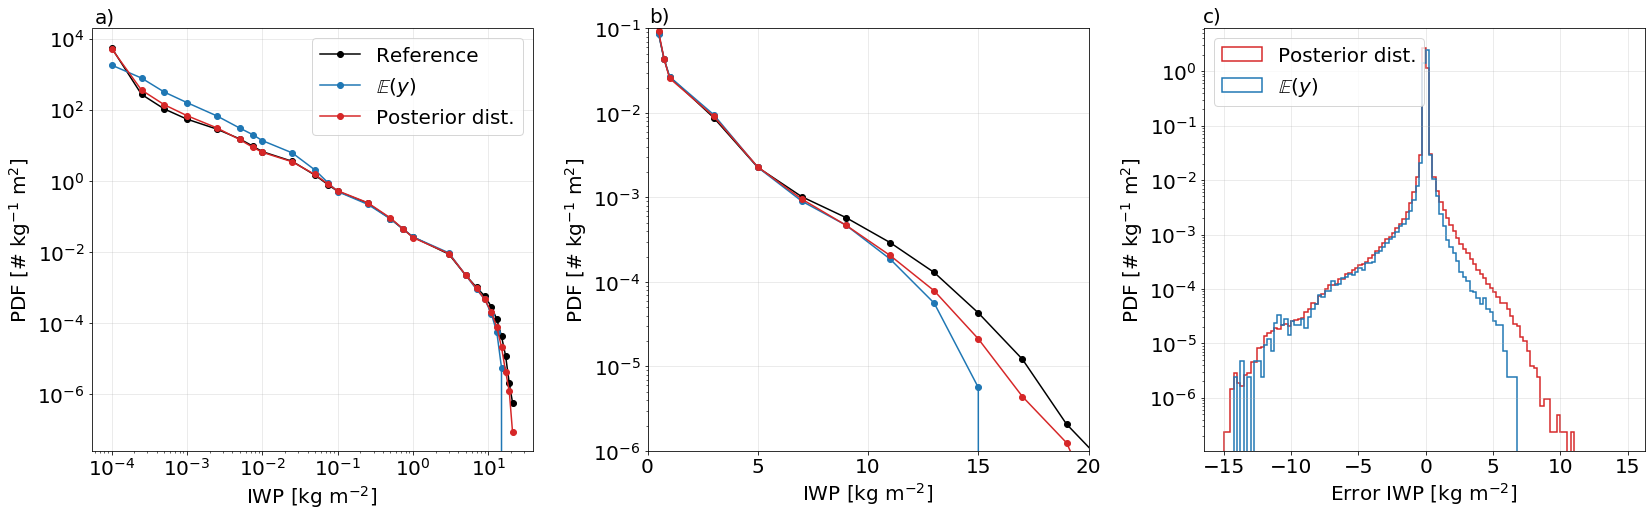

In [66]:
plt.rcParams.update({'font.size': 20})
#bins1 = np.arange(-1, 20, 0.1)

bins1 = np.array([0.0,.0001,.00025,.0005, 0.001,.0025,.005,
                 0.0075, 0.01, 0.025, 0.05, 0.075, .1, .25,
                 .5, .75, 1, 3, 5, 7, 9,  11, 13, 15, 17, 19,  21])

bin_center = (bins1[1:] + bins1[:-1])/2
fig, ax = plt.subplots(1, 3, figsize = [24, 8])
ax = ax.ravel()
fig.tight_layout(pad = 3)
#mask = (y_pos_mean1 < y_pre1[:, -13]) & (y_pos_mean1 > y_pre1[:, 12])
#np.sum(mask)

hist, _       = np.histogram(AY.ravel(), bins1, density = True)
hist_mea, _     = np.histogram(AY_mean.ravel(), bins1, density = True)
hist_sam, _ = np.histogram(ay_sam.ravel(), bins1, density = True)

ax[0].plot(bins1[1:], hist, "k-o", label = "Reference")
ax[0].plot(bins1[1:], hist_mea,"-o",  color = "tab:blue",  label =  r"$\mathbb{E}(y)$")
ax[0].plot(bins1[1:], hist_sam, "-o", color = "tab:red", label = "Posterior dist.")

#ax.hist(a, bins1, density = True , histtype = "step", label = "QRNN")
#ax.hist(np.exp(y1), bins1, density = True, histtype = "step", label = "GMI")

ax[0].set_yscale('log')
ax[0].set_xscale('log')

#ax[0].set_title(title)
ax[0].legend()
ax[0].grid("on", alpha = 0.3)
ax[0].set_ylabel(r"PDF [# kg$^{-1}$ m$^{2}$]")
ax[0].set_xlabel(r"IWP [kg m$^{-2}$]")

ax[1].plot(bins1[1:], hist, "k-o", label = "Reference")
ax[1].plot(bins1[1:], hist_mea,"-o",  color = "tab:blue",  label = "E(y)")
ax[1].plot(bins1[1:], hist_sam, "-o", color = "tab:red", label = "Posterior distribution")
ax[1].set_xlim([0, 20])
ax[1].set_ylim([1e-6, 1e-1])
ax[1].set_yscale('log')
ax[1].grid("on", alpha =0.3)
ax[1].set_ylabel(r"PDF [# kg$^{-1}$ m$^{2}$]")
ax[1].set_xlabel(r"IWP [kg m$^{-2}$]")

errbins = np.arange(-15, 15, 0.25)
ax[2].hist(err1, errbins, density = True, histtype = "step", color = "tab:red", linewidth = "1.5",  label = "Posterior dist.")
ax[2].hist(err2, errbins, density = True, histtype = "step", color = "tab:blue",linewidth = "1.5", label = r"$\mathbb{E}(y)$")
#ax.hist(err3, errbins, density = True, histtype = "step", label = "")
ax[2].set_yscale("log")
ax[2].grid("on", alpha = 0.3)
ax[2].set_xlabel(r"Error IWP [kg m$^{-2}$]")
ax[2].set_ylabel(r"PDF [# kg$^{-1}$ m$^{2}$]")
ax[2].legend(loc = "upper left")

ax[0].text(0.00006, 27000, "a)")
ax[1].text(0.07, 0.12, "b)")
ax[2].text(-16.5, 8, "c)")
fig.savefig("PDF_posterior_dist.pdf", bbox_inches = "tight")